In [7]:
import numpy as np
import math 
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Алгоритм Нелдера-Мида

In [8]:
#f(x,y) = (1 - x)^2 + 100*(y - x^2)^2

In [9]:
def rosenbrock(x): #Функция Розенброка
    return (1.0 - x[0])**2 + 100.0 * (x[1] - x[0] * x[0] )**2
    

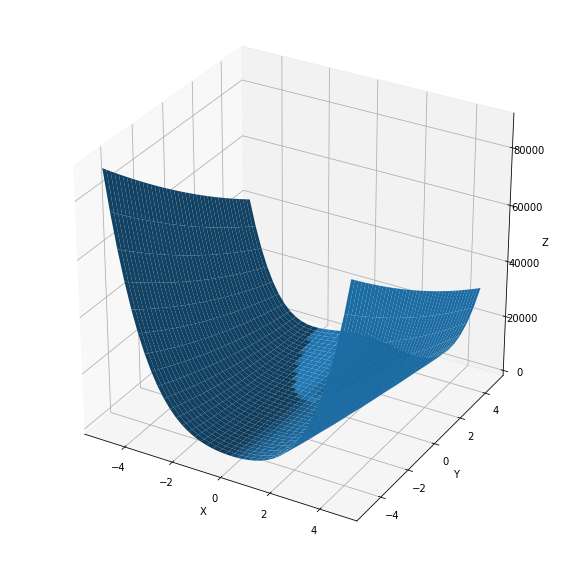

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock([X, Y])

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [11]:
n = 2 # Начальная точка поиска минимума функции
x0 = np.zeros(2, dtype = float) # Вектор с двумя элементами типа float (новый массив заполненный нулями)
x0[0] = 5.0
x0[1] = -5.0
xtol = 1.0e-5 # Точность поиска экстремума

In [12]:
# Находим минимум функции
res = opt.minimize(rosenbrock, x0, method = 'Nelder-Mead', options = {'xtol': xtol})
print(res)

 final_simplex: (array([[0.99999804, 0.99999609],
       [1.00000156, 1.0000033 ],
       [1.00000214, 1.00000398]]), array([3.84730420e-12, 5.66419381e-12, 1.41157632e-11]))
           fun: 3.84730420457514e-12
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 70
        status: 0
       success: True
             x: array([0.99999804, 0.99999609])


# Метод имитации отжига

In [19]:
#метод имитации отжига
import numpy as np
from scipy.optimize import rosen
params = (2, 3, 7, 8, 9, 10, 44, -1, 2, 26, 1, -2, 0.5)


In [21]:
x0 = np.array([2., 2.])     # 
bounds = [(0, 2), (0, 2)]
np.random.seed(555)
res = opt.dual_annealing(rosen, bounds)
print(res)

     fun: 9.251609277558398e-12
 message: ['Maximum number of iteration reached']
    nfev: 4052
    nhev: 0
     nit: 1000
    njev: 0
       x: array([0.99999696, 0.99999392])


# Метод дифференциальной эволюции

In [121]:
from scipy.optimize import differential_evolution
bounds = [(0, 2), (0, 2)]
result = differential_evolution(rosenbrock, bounds)
print(result)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 3633
     nit: 120
 success: True
       x: array([1., 1.])


In [122]:
from scipy.optimize import differential_evolution 
import numpy as np
def ackley(x): #тестовая функция для алгоритма дифференциальной эволюции
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
bounds = [(-5, 5), (-5, 5)]
result = differential_evolution(ackley, bounds)
print(result)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3063
     nit: 99
 success: True
       x: array([0., 0.])


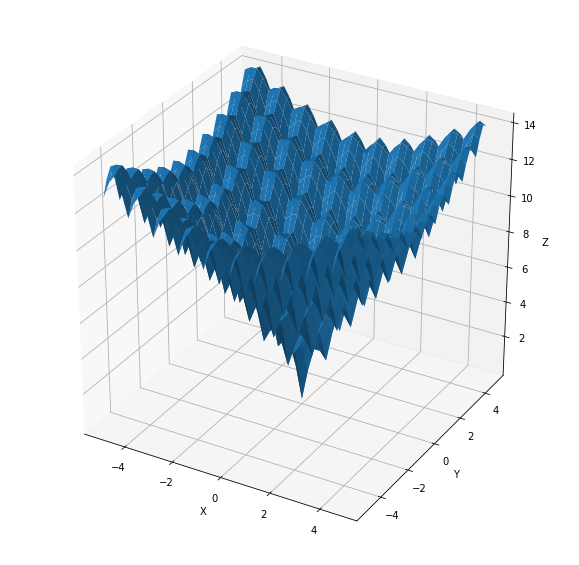

In [123]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ackley([X, Y])

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [136]:
import random
def annealing_optimize(domain, costf, T=10000.0, cool=0.99, step=1):
    
    vec = [random.randint(0, domain[i]) for i in range(len(domain))] # Выбрать случаиное решение

    while T > 0.1:
    # Выбрать один из индексов
        i = random.randint(0, len(domain) - 1)

        # Выбрать направление изменения
        dir = random.randint(-step, step)

        # Создать новыи список, в котором одно значение изменено
        vecb = vec[:]
        vecb[i] += dir
        if vecb[i] < 0: vecb[i] = 0
        elif vecb[i] > domain[i]: vecb[i] = domain[i]

        # Вычислить текущую и новую стоимость
        ea = costf(vec)
        eb = costf(vecb)
        p = pow(math.e, (-eb-ea)/T)

        # Новое решение лучше? 
        if (eb < ea or random.random() < p):
            vec = vecb      

        # Уменьшить температуру
        T = T * cool
    return vec, eb

result, score = annealing_optimize([0,2,5,1,2], 5)
print (result, score)

TypeError: 'int' object is not callable